<a href="https://colab.research.google.com/github/reza-pishva/6-MachineLearning-Python/blob/main/cnn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [4]:
data_dir = './drive/MyDrive/dataset'

In [5]:
image_exts = ['jpeg','jpg','bmp','png']

In [6]:
image_exts[0]

'jpeg'

In [17]:
# os.listdir(os.path.join(data_dir,'sad'))

In [18]:
# for image_class in os.listdir(data_dir):
#   for image in os.listdir(os.path.join(data_dir,image_class)):
#     print(image)

In [7]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
        image = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts:
          print('image not in ext list {}'.format(image_path))
          os.remove(image_path)
    except Exception as e:
      print('issue with image {}'.format(image_path))

array([[[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [135, 144, 217],
        [134, 143, 216],
        [134, 143, 216]],

       [[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [135, 144, 217],
        [135, 144, 217],
        [134, 143, 216]],

       [[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [134, 146, 218],
        [133, 145, 217],
        [133, 145, 217]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   2,   0],
        [  3,   1,   0],
        [  1,   1,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   2,   0],
        [  1,   2,   0],
        [  1,   1,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   2,   0],
        [  1,   2,   0],
        [  0,   2,   0]]], dtype=uint8)
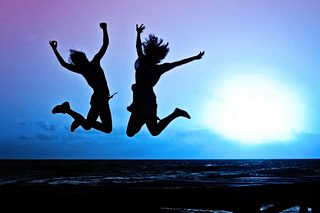

In [9]:
cv2.imread(os.path.join(data_dir,'happy','_happy_jumping_on_beach-40815.jpg'))

array([[[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [135, 144, 217],
        [134, 143, 216],
        [134, 143, 216]],

       [[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [135, 144, 217],
        [135, 144, 217],
        [134, 143, 216]],

       [[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [134, 146, 218],
        [133, 145, 217],
        [133, 145, 217]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   2,   0],
        [  3,   1,   0],
        [  1,   1,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   2,   0],
        [  1,   2,   0],
        [  1,   1,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   2,   0],
        [  1,   2,   0],
        [  0,   2,   0]]], dtype=uint8)
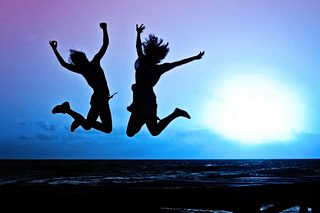

In [10]:
img = cv2.imread(os.path.join(data_dir,'happy','_happy_jumping_on_beach-40815.jpg'))
img

In [11]:
img.shape

(213, 320, 3)

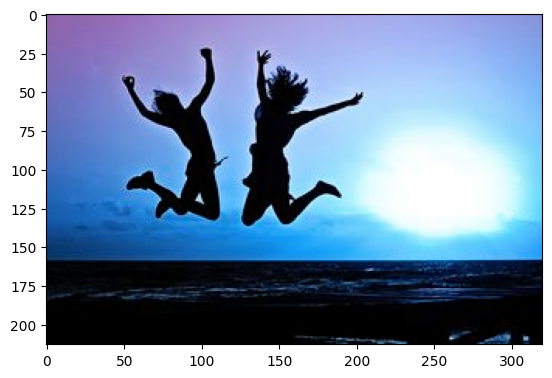

In [12]:
plt.imshow(img)

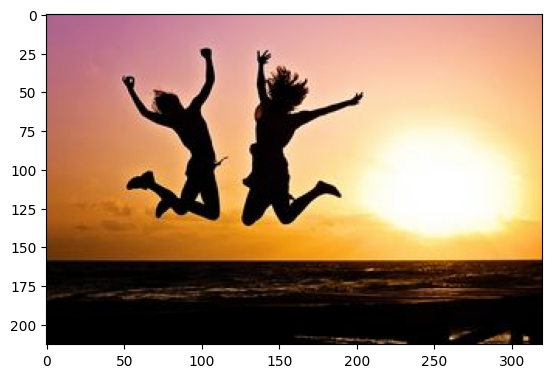

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
import numpy as np

In [15]:
tf.keras.utils.image_dataset_from_directory??

In [16]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data

Found 1118 files belonging to 3 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [24]:
# batch

In [18]:
len(batch)

2

In [19]:
batch[1]

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int32)

In [20]:
batch[0].shape

(32, 256, 256, 3)

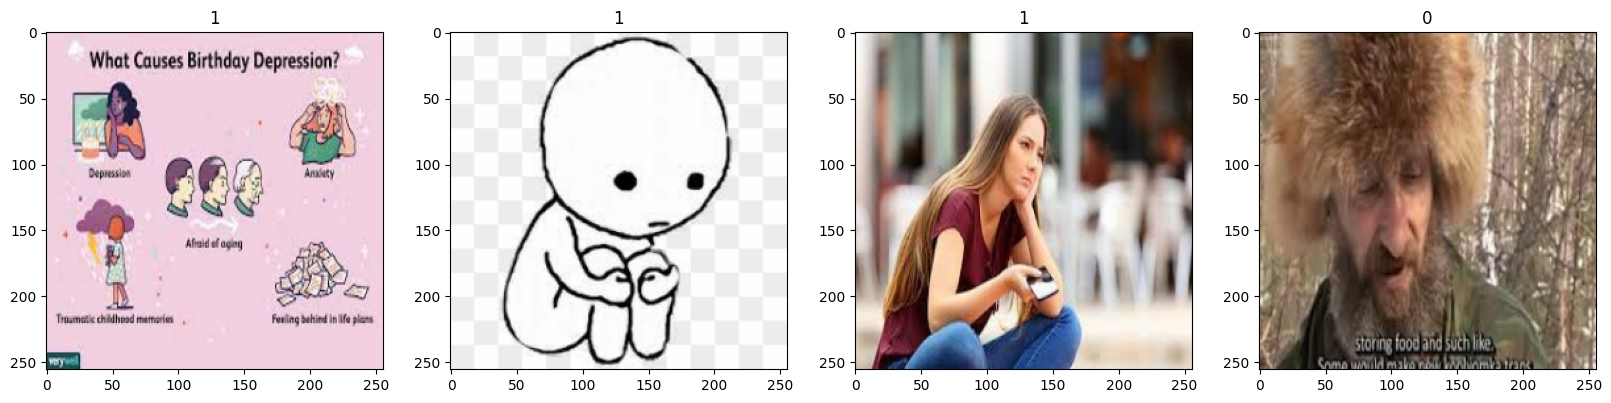

In [21]:
fig, ax =plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [22]:
scaled = batch[0]/255
scaled.max()

1.0

In [23]:
data = data.map(lambda x,y:(x/255,y))
scaled_iterator = data.as_numpy_iterator()
scaled_iterator.next()[0].max()

1.0

In [24]:
scaled_iterator.next()[0].max()

1.0

In [25]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.1)
test_size = int(len(data)*.1)

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size).skip(val_size).take(test_size)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [31]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.FalseNegatives(),
    ],
)

In [32]:
history = model.fit(train,validation_data=val,epochs=9)

Epoch 1/9
24/24 [==============================] - 59s 2s/step - loss: 0.8402 - binary_accuracy: 0.5482 - false_negatives: 105.0000 - val_loss: 0.6832 - val_binary_accuracy: 0.5938 - val_false_negatives: 0.0000e+00
Epoch 2/9
24/24 [==============================] - 58s 2s/step - loss: 0.6608 - binary_accuracy: 0.6081 - false_negatives: 1.0000 - val_loss: 0.6385 - val_binary_accuracy: 0.5625 - val_false_negatives: 0.0000e+00
Epoch 3/9
24/24 [==============================] - 58s 2s/step - loss: 0.5756 - binary_accuracy: 0.6914 - false_negatives: 94.0000 - val_loss: 0.5650 - val_binary_accuracy: 0.8021 - val_false_negatives: 0.0000e+00
Epoch 4/9
24/24 [==============================] - 57s 2s/step - loss: 0.4594 - binary_accuracy: 0.7930 - false_negatives: 60.0000 - val_loss: 0.6251 - val_binary_accuracy: 0.7083 - val_false_negatives: 1.0000
Epoch 5/9
24/24 [==============================] - 57s 2s/step - loss: 0.3744 - binary_accuracy: 0.8229 - false_negatives: 58.0000 - val_loss: 0.431

In [33]:
history.history

{'loss': [0.840222179889679,
  0.6607773900032043,
  0.5755764842033386,
  0.4593680799007416,
  0.3743942677974701,
  0.29048052430152893,
  0.16375505924224854,
  0.10098405927419662,
  0.07474163919687271],
 'binary_accuracy': [0.5481770634651184,
  0.6080729365348816,
  0.69140625,
  0.79296875,
  0.8229166865348816,
  0.8736979365348816,
  0.9127604365348816,
  0.9401041865348816,
  0.9440104365348816],
 'false_negatives': [105.0, 1.0, 94.0, 60.0, 58.0, 54.0, 37.0, 20.0, 17.0],
 'val_loss': [0.6832286715507507,
  0.6384890079498291,
  0.5649637579917908,
  0.625058114528656,
  0.4311417043209076,
  0.3410762846469879,
  0.30960798263549805,
  0.5087007880210876,
  0.42411938309669495],
 'val_binary_accuracy': [0.59375,
  0.5625,
  0.8020833134651184,
  0.7083333134651184,
  0.8125,
  0.8645833134651184,
  0.8958333134651184,
  0.84375,
  0.8541666865348816],
 'val_false_negatives': [0.0, 0.0, 0.0, 1.0, 12.0, 8.0, 5.0, 2.0, 5.0]}

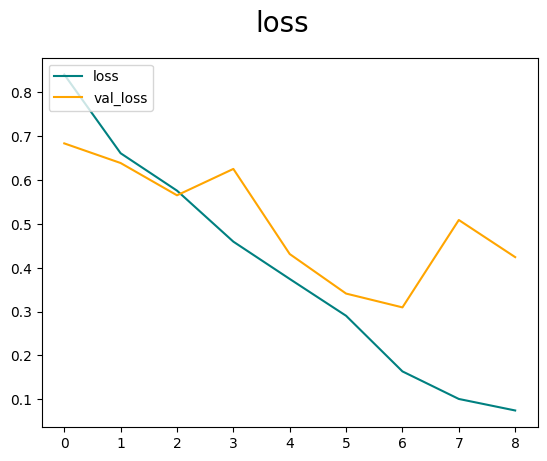

In [34]:
fig = plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

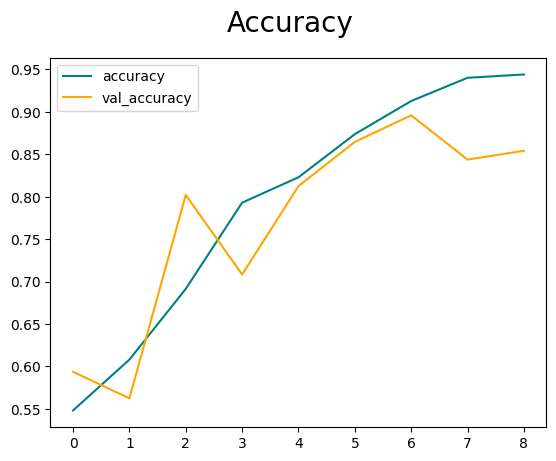

In [35]:
fig = plt.figure()
plt.plot(history.history['binary_accuracy'],color='teal',label='accuracy')
plt.plot(history.history['val_binary_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [36]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [152]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)
print(pre.result(),re.result(),acc.result())

NotFoundError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} ./drive/MyDrive/dataset/test/images1.jpg; No such file or directory
	 [[{{node ReadFile}}]] [Op:IteratorGetNext] name: 

In [153]:
# img = cv2.imread('12165734.jpg')
# plt.imshow(cv2.cvtColor(img ,cv2.COLOR_BGR2RGB))
# plt.show()
img = cv2.imread(os.path.join(data_dir,'test','images1.jpg'))
img

In [154]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


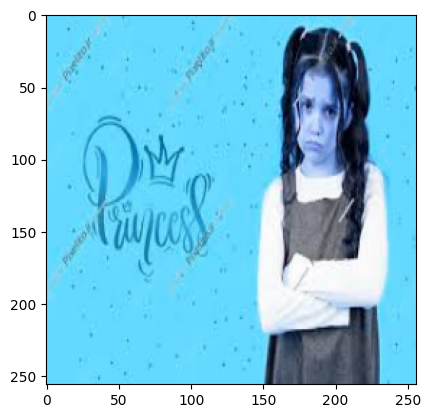

In [103]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [104]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','HappySadModel.h5'))
new_model = load_model(os.path.join('models','HappySadModel.h5'))
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 158ms/step


In [105]:
yhatnew

array([[0.97386426]], dtype=float32)

In [106]:
if yhatnew>.5:
  print('happy')
else:
  print('sad')

happy
